In [1]:
import functools
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

import const
from read import read_data, read_passfail
from graphs import create_graph_passrate, show_passrate, set_style, set_style_xticks, C_PASS, C_FAIL, C_MACROS, C_SCALE

In [2]:
data = read_data()
passfail = read_passfail()
passfail

,date,sleep_night_time,sleep_day_time,sleep_total_time,read_total_time,side_projects_time,phone_time,tv_time,exercise_total_time,exercise_shoulder_raises_volume,macros_kcal
0,2024-10-01,True,True,True,True,True,True,True,True,False,False
1,2024-10-02,False,True,False,True,True,False,True,True,False,True
2,2024-10-03,True,True,True,True,True,True,True,True,False,False
3,2024-10-04,False,False,True,True,True,False,True,True,False,False
4,2024-10-05,False,True,False,True,True,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
177,2025-03-27,True,False,True,False,True,True,True,True,False,False
178,2025-03-28,False,False,True,True,True,True,True,True,True,True
179,2025-03-29,True,True,True,True,True,True,True,False,True,False
180,2025-03-30,True,True,True,True,True,True,True,False,True,True


### Sleep

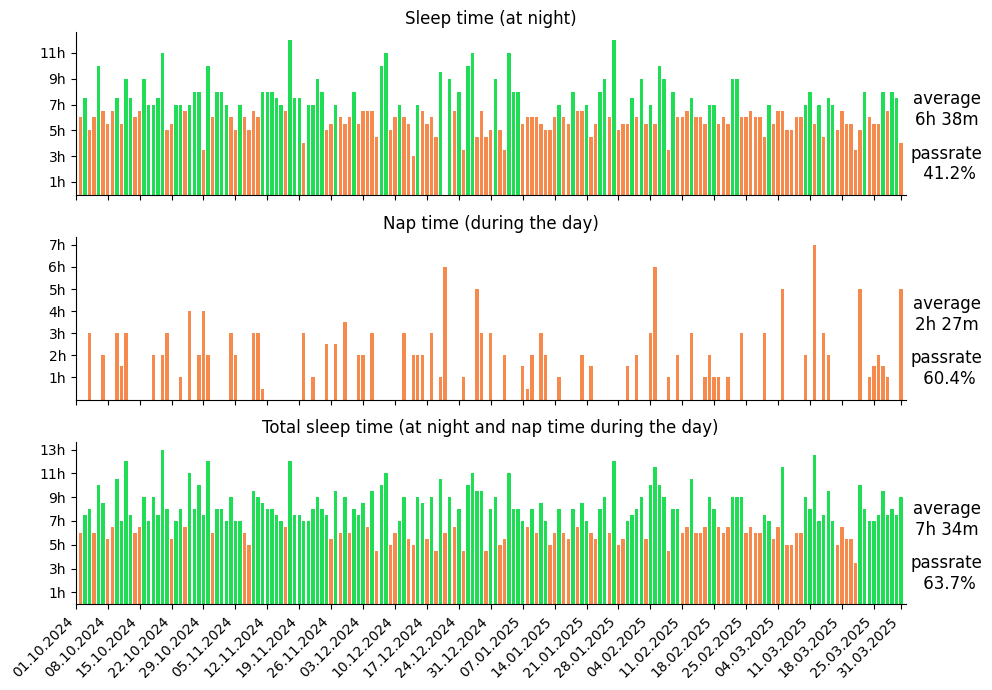

In [3]:
create_graph_passrate(
    data,
    passfail,
    const.COLS_SLEEPING,
    ['Sleep time (at night)', 'Nap time (during the day)', 'Total sleep time (at night and nap time during the day)'],
    time_format=True)

### Read

Reading time


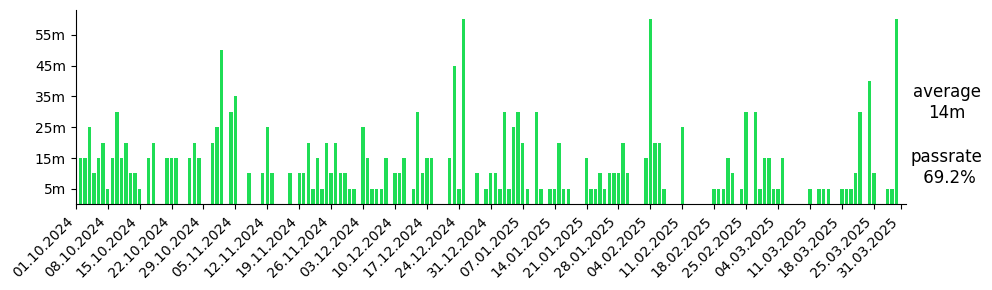

In [4]:
create_graph_passrate(data, passfail, const.COLS_READING[-1:], ['Reading time'], time_format=True)

### Work

Working on side projects


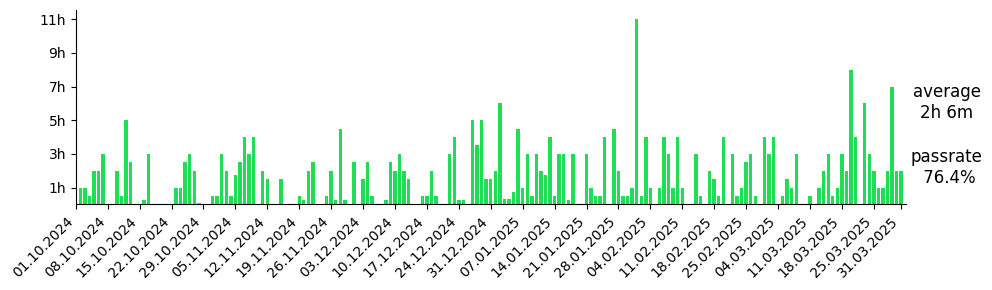

In [5]:
create_graph_passrate(data, passfail, const.COLS_WORKING[-1:], ['Working on side projects'], time_format=True)

### Leisure

Phone usage


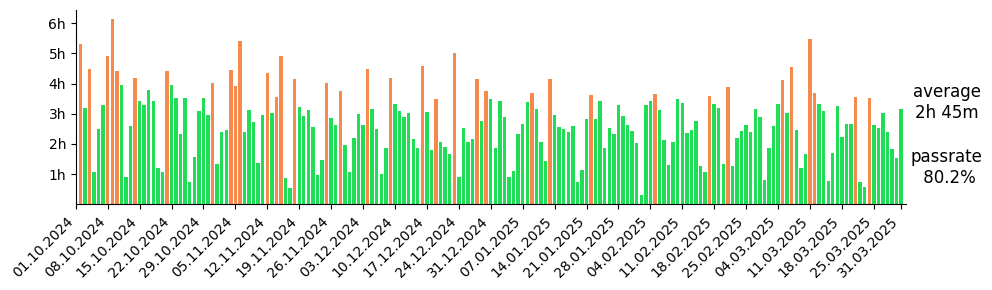

Watching TV


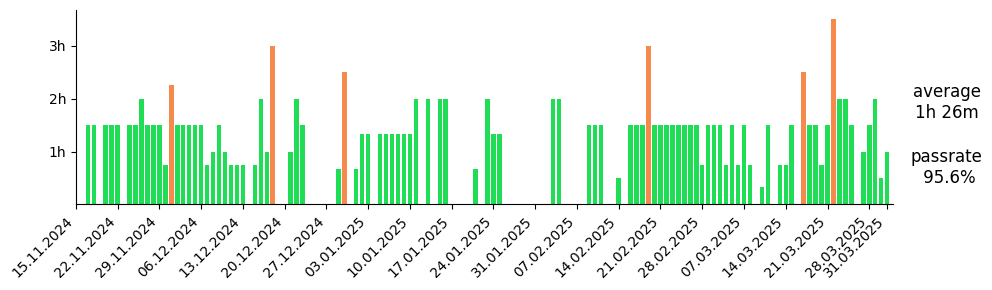

In [6]:
phone, tv = const.COLS_LEISURE
create_graph_passrate(data, passfail, [phone], ['Phone usage'], time_format=True)
create_graph_passrate(data[45:], passfail[45:], [tv], ['Watching TV'], time_format=True)

### Exercise

Exercise time


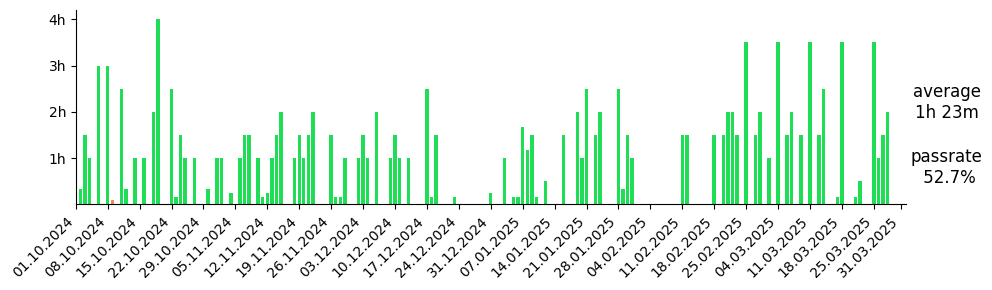

In [7]:
create_graph_passrate(data, passfail, [const.COLS_EXERCISE[-1]], ['Exercise time'], time_format=True)

Shoulder raises


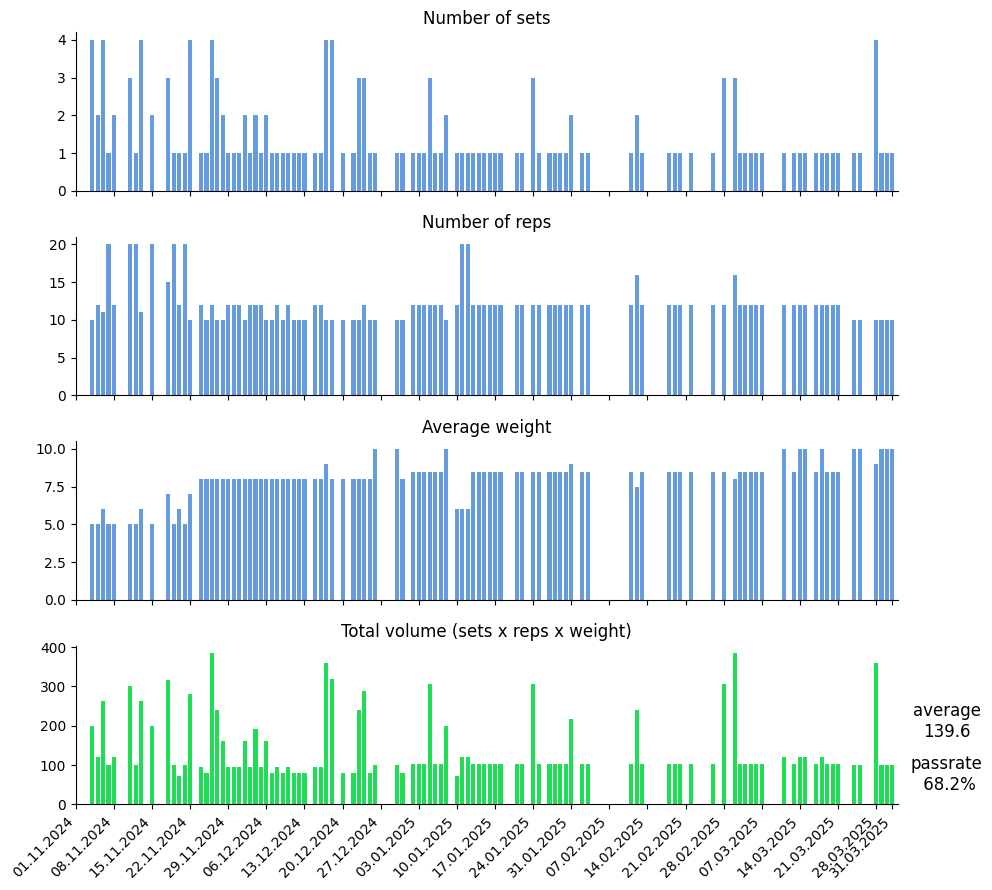

In [8]:
print('Shoulder raises')
create_graph_passrate(
    data[31:],
    passfail[31:],
    const.COLS_SHOULDER_RAISES,
    ['Number of sets', 'Number of reps', 'Average weight', 'Total volume (sets x reps x weight)'],
    time_format=False)

### Calories

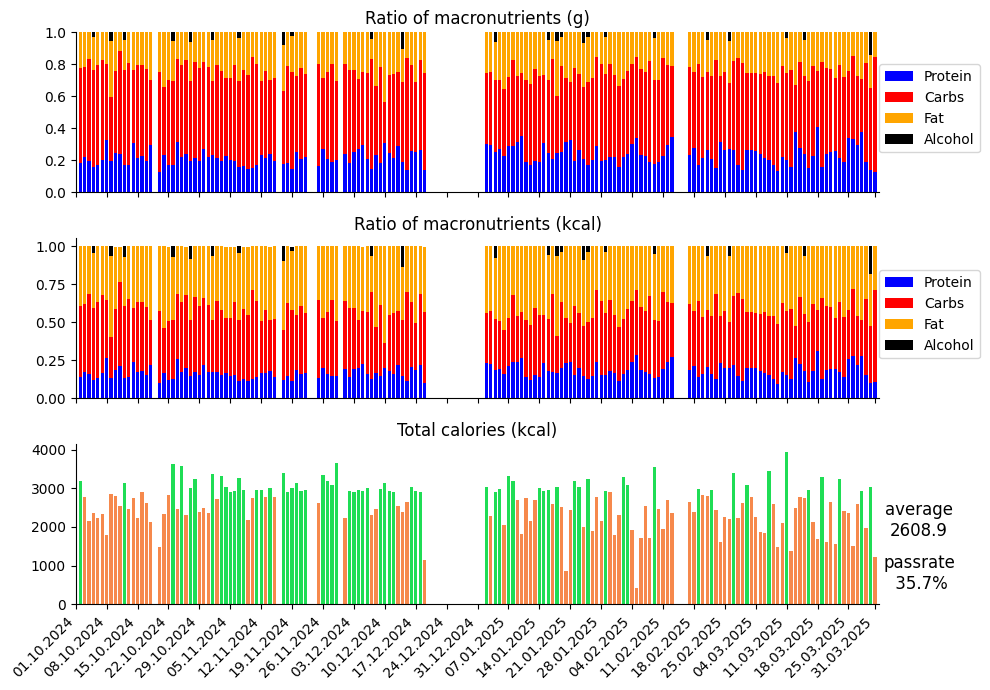

In [9]:
p, c, f, a, kcal = const.COLS_EATING
fig, axes = plt.subplots(3, 1, figsize=(10, 7), sharex=True)

data['total_g'] = data[p] + data[c] + data[f] + data[a]
axes[0].bar(data['date'], data[p] / data['total_g'], color=C_MACROS[0], width=0.75, label='Protein')
axes[0].bar(data['date'], data[c] / data['total_g'], color=C_MACROS[1], width=0.75, label='Carbs', bottom=data[p] / data['total_g'])
axes[0].bar(data['date'], data[f] / data['total_g'], color=C_MACROS[2], width=0.75, label='Fat', bottom=(data[p] + data[c]) / data['total_g'])
axes[0].bar(data['date'], data[a] / data['total_g'], color=C_MACROS[3], width=0.75, label='Alcohol', bottom=(data[p] + data[c] + data[f]) / data['total_g'])
axes[0].legend(ncol=1, loc=(1.0, 0.25))
data.drop('total_g', axis=1, inplace=True)

data['p_kcal'] = data[p] * 4 / data[kcal]
data['c_kcal'] = data[c] * 4 / data[kcal]
data['f_kcal'] = data[f] * 9 / data[kcal]
data['a_kcal'] = data[a] * 7 / data[kcal]
axes[1].bar(data['date'], data['p_kcal'], color=C_MACROS[0], width=0.75, label='Protein')
axes[1].bar(data['date'], data['c_kcal'], color=C_MACROS[1], width=0.75, label='Carbs', bottom=data['p_kcal'])
axes[1].bar(data['date'], data['f_kcal'], color=C_MACROS[2], width=0.75, label='Fat', bottom=data['p_kcal'] + data['c_kcal'])
axes[1].bar(data['date'], data['a_kcal'], color=C_MACROS[3], width=0.75, label='Alcohol', bottom=data['p_kcal'] + data['c_kcal'] + data['f_kcal'])
axes[1].legend(ncol=1, loc=(1.0, 0.25))
data.drop(['p_kcal', 'c_kcal', 'f_kcal', 'a_kcal'], axis=1, inplace=True)

show_passrate(axes[2], data[kcal], passfail[kcal], data['date'], time_format=False)

set_style(axes[0], data['date'])
set_style(axes[1], data['date'])

axes[0].set_title('Ratio of macronutrients (g)')
axes[1].set_title('Ratio of macronutrients (kcal)')
axes[2].set_title('Total calories (kcal)')
fig.tight_layout()
plt.show()

### Energy

Energy level (subjective)


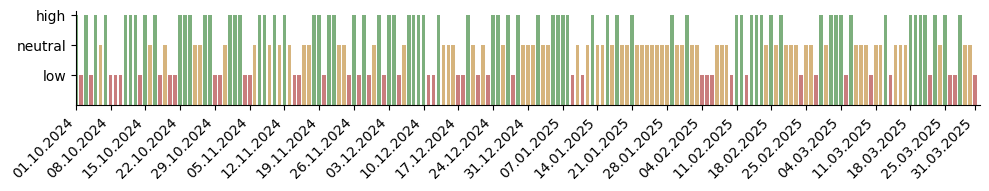

In [10]:
series = data[const.COLS_OTHER[-1]]
colormap = { 1: C_SCALE[0], 2: C_SCALE[1], 3: C_SCALE[2], 0: 'grey' }
colors = [colormap[v] for v in series]

print('Energy level (subjective)')
fig, ax = plt.subplots(1, 1, figsize=(10, 2), sharex=True)
ax.bar(data['date'], series, color=colors, width=0.75)
set_style(ax, data['date'])
set_style_xticks(ax, data['date'])
ax.set_yticks([1, 2, 3])
ax.set_yticklabels(['low', 'neutral', 'high'])
fig.tight_layout()
plt.show()

### Weekly

Weekly passrates


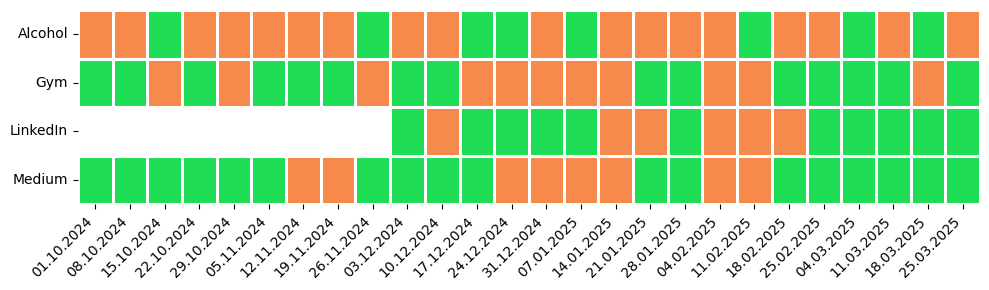

In [11]:
start_date = data['date'].min()
split_into_days = lambda i: start_date + pd.to_timedelta(((data['date'] - start_date).dt.days // i) * i, unit='D')
data['week'] = split_into_days(7)
data['biweek'] = split_into_days(14)

alcohol_weekly = data.groupby('week')[const.COLS_EATING[3]].sum() <= 1
gym_weekly = data.groupby('week')[const.COLS_EXERCISE[1]].apply(lambda x: (x > 0).sum()) >= 2
linkedin = data.groupby('week')[const.COLS_PUBLISHING[1]].sum() >= 3
medium = data.groupby('biweek')[const.COLS_PUBLISHING[0]].sum() >= 1

weekly_passfail = functools.reduce(
    lambda df1, df2: pd.merge(df1, df2, left_index=True, right_index=True, how='outer'),
    [alcohol_weekly, gym_weekly, linkedin, medium])
weekly_passfail[const.COLS_PUBLISHING[0]] = weekly_passfail[const.COLS_PUBLISHING[0]].fillna(method='ffill') # forward fill
for c in weekly_passfail.columns:
    weekly_passfail[c] = weekly_passfail[c].map({True: 1.0, False: 0.5})
weekly_passfail[const.COLS_PUBLISHING[1]][:9] = 0.0
weekly_passfail = weekly_passfail.transpose()

print('Weekly passrates')
fig, ax = plt.subplots(1, 1, figsize=(10, 3), sharex=True)
cmap = mcolors.ListedColormap(['white', C_FAIL, C_PASS])
sns.heatmap(weekly_passfail, annot=False, cmap=cmap, cbar=False, linewidths=1, linecolor='white')
ax.set_xticks([i + 0.5 for i in range(len(weekly_passfail.columns))])
ax.set_xticklabels(weekly_passfail.columns.map(lambda x: x.strftime('%d.%m.%Y')), rotation=45, ha='right')
ax.set_yticks([i + 0.5 for i in range(len(weekly_passfail.index))])
ax.set_yticklabels(['Alcohol', 'Gym', 'LinkedIn', 'Medium'])
fig.tight_layout()
plt.show()

### Daily

Daily passrates


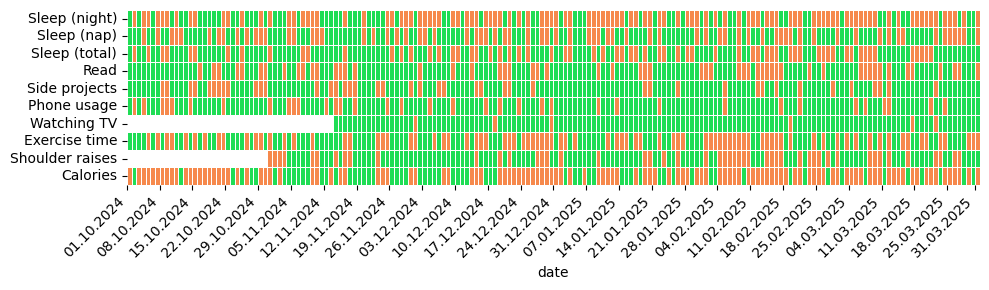

In [12]:
print('Daily passrates')
fig, ax = plt.subplots(1, 1, figsize=(10, 3), sharex=True)
cmap = mcolors.ListedColormap(['white', C_FAIL, C_PASS])

daily_passfail = passfail.copy()
daily_passfail.index = daily_passfail['date']
daily_passfail.drop('date', axis=1, inplace=True)
for c in daily_passfail.columns:
    daily_passfail[c] = daily_passfail[c].map({True: 1.0, False: 0.5})
daily_passfail[const.COLS_SHOULDER_RAISES[-1]][:30] = 0.0
daily_passfail[const.COLS_LEISURE[-1]][:44] = 0.0
daily_passfail = daily_passfail.transpose()

sns.heatmap(daily_passfail, annot=False, cmap=cmap, cbar=False, linewidths=0.5, linecolor='white')
ax.set_xticks(
    list(range(len(daily_passfail.columns))[::7]) + 
    list(range(len(daily_passfail.columns))[-1:]))
ax.set_xticklabels([x.strftime('%d.%m.%Y') for x in
                    list(daily_passfail.columns[::7]) + list(daily_passfail.columns[-1:])
                   ], rotation=45, ha='right')
ax.set_yticks([i + 0.5 for i in range(len(daily_passfail.index))])
ax.set_yticklabels(['Sleep (night)', 'Sleep (nap)', 'Sleep (total)',
                    'Read', 'Side projects', 'Phone usage', 'Watching TV',
                    'Exercise time', 'Shoulder raises', 'Calories'])
fig.tight_layout()
plt.show()